In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite.gml import read_gml
from networkx.algorithms.community.label_propagation import label_propagation_communities
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.smallworld import random_reference
from typing import Dict
import numpy as np

In [17]:
def label_propagation(graphs: Dict[str, nx.Graph]):
    communities = {}
    for key, graph in graphs.items():
        communities[key] = list(label_propagation_communities(graph))
    return communities
    

def greedy_modularity(graphs: Dict[str, nx.Graph]):
    communities = {}
    for key, graph in graphs.items():
        communities[key] = greedy_modularity_communities(graph)
    return communities


def randomise_graph(graphs: Dict[str, nx.Graph]):
    for graph in graphs:
        random_reference(graph)
        
def plot_graph(title, label, graph: nx.Graph):

    size_of_community = len(label)
    colour_spectrum = np.linspace(0,1,size_of_community)
    count = 0
    for community in label:
        for node in community:
            graph.nodes[node]['colour'] = colour_spectrum[count]
        count += 1
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.set_title(title)
    colours = [graph.nodes[node]['colour'] for node in graph]
    nx.draw(graph, node_color=colours)

In [3]:
graphs = {}
graphs['Karate'] = read_gml('data/graph_karate.gml')
graphs['Dolphins'] = read_gml('data/graph_dolphins.gml')
graphs['Facebook'] = read_gml('data/graph_facebook.gml')

In [25]:
randomised_graphs = {}
for key, graph in graphs.items():
    randomised_graphs[key] = random_reference(graph, connectivity=False)

In [26]:
greedy_dict = greedy_modularity(graphs)
greedy_randomised_dict = greedy_modularity(randomised_graphs)

In [27]:
label_dict = label_propagation(graphs)
label_randomised_dict = label_propagation(randomised_graphs)

Size of greedy Karate community before random = 3
Size of greedy Karate community after random = 5
Size of label Karate community before random = 3
Size of label Karate community after random = 2


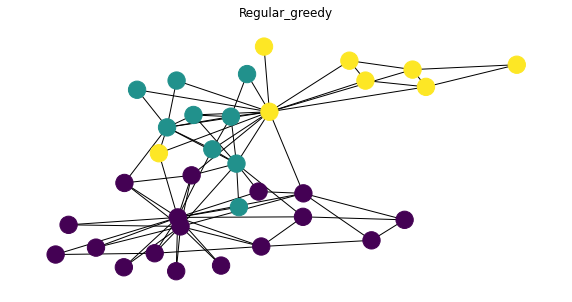

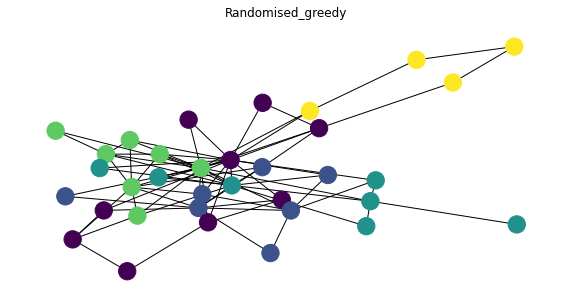

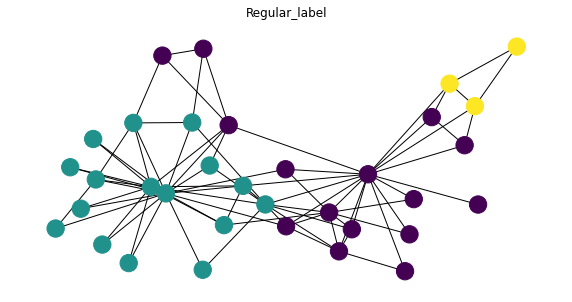

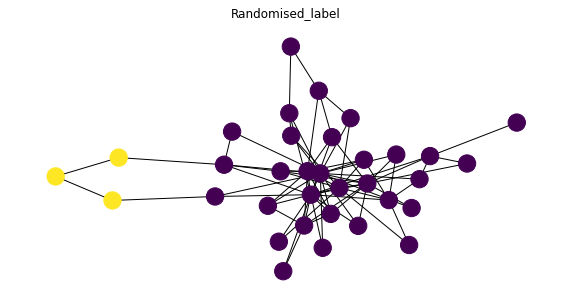

In [28]:
print(f"Size of greedy Karate community before random = {len(greedy_dict['Karate'])}")
print(f"Size of greedy Karate community after random = {len(greedy_randomised_dict['Karate'])}")
print(f"Size of label Karate community before random = {len(label_dict['Karate'])}")
print(f"Size of label Karate community after random = {len(label_randomised_dict['Karate'])}")
plot_graph('Regular_greedy', greedy_dict['Karate'], graphs['Karate'])
plot_graph('Randomised_greedy', greedy_randomised_dict['Karate'], randomised_graphs['Karate'])
plot_graph('Regular_label', label_dict['Karate'], graphs['Karate'])
plot_graph('Randomised_label', label_randomised_dict['Karate'], randomised_graphs['Karate'])

Size of greedy Dolphins community before random = 4
Size of greedy Dolphins community after random = 6
Size of label Dolphins community before random = 6
Size of label Dolphins community after random = 1


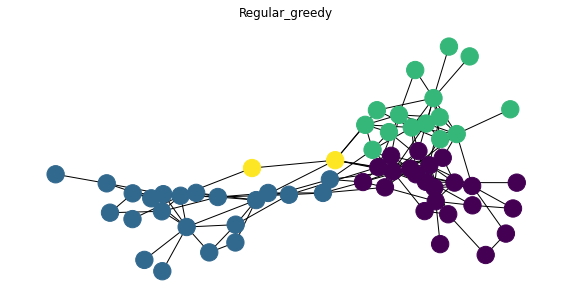

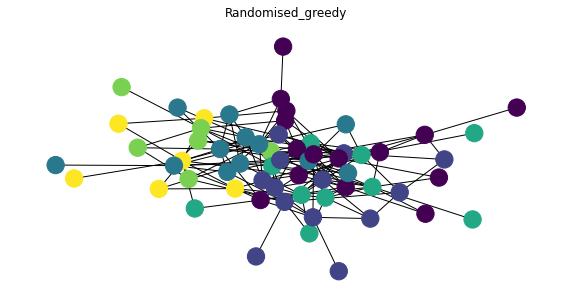

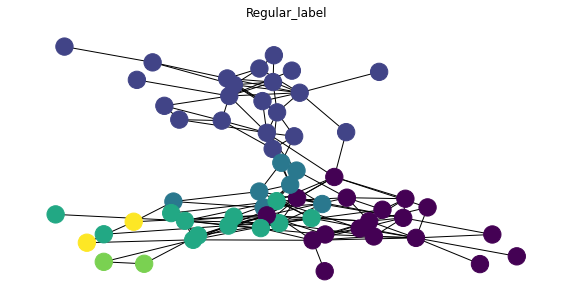

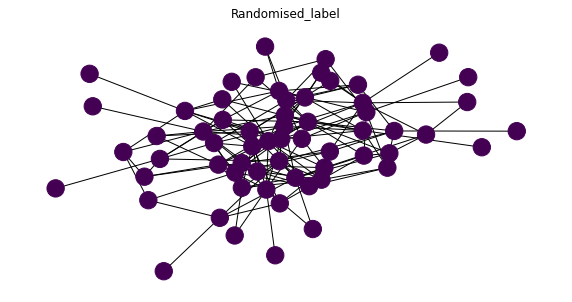

In [29]:
print(f"Size of greedy Dolphins community before random = {len(greedy_dict['Dolphins'])}")
print(f"Size of greedy Dolphins community after random = {len(greedy_randomised_dict['Dolphins'])}")
print(f"Size of label Dolphins community before random = {len(label_dict['Dolphins'])}")
print(f"Size of label Dolphins community after random = {len(label_randomised_dict['Dolphins'])}")
plot_graph('Regular_greedy', greedy_dict['Dolphins'], graphs['Dolphins'])
plot_graph('Randomised_greedy', greedy_randomised_dict['Dolphins'], randomised_graphs['Dolphins'])
plot_graph('Regular_label', label_dict['Dolphins'], graphs['Dolphins'])
plot_graph('Randomised_label', label_randomised_dict['Dolphins'], randomised_graphs['Dolphins'])

Size of greedy Facebook community before random = 13
Size of greedy Facebook community after random = 19
Size of label Facebook community before random = 44
Size of label Facebook community after random = 2


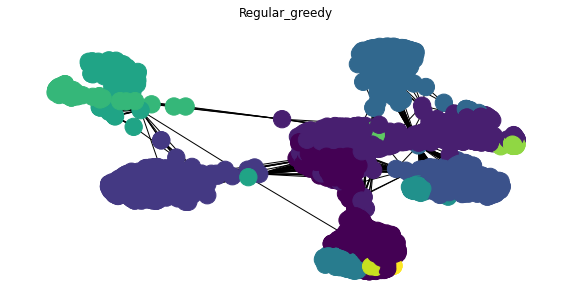

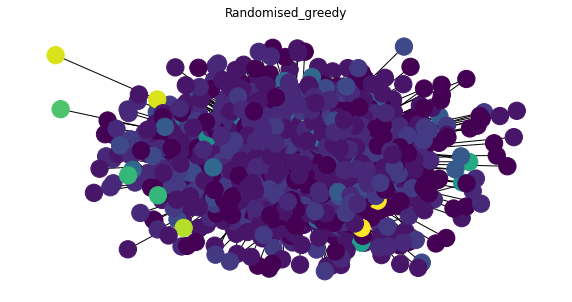

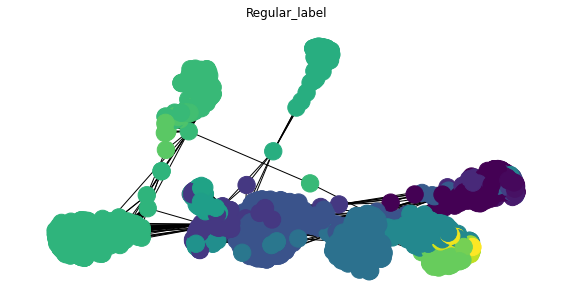

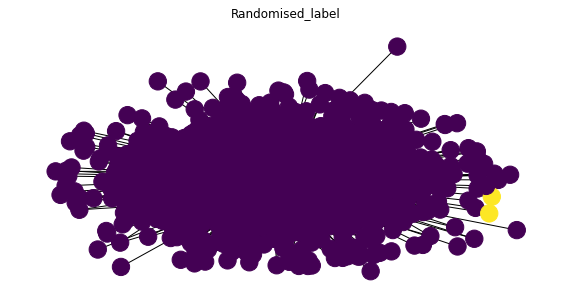

In [30]:
print(f"Size of greedy Facebook community before random = {len(greedy_dict['Facebook'])}")
print(f"Size of greedy Facebook community after random = {len(greedy_randomised_dict['Facebook'])}")
print(f"Size of label Facebook community before random = {len(label_dict['Facebook'])}")
print(f"Size of label Facebook community after random = {len(label_randomised_dict['Facebook'])}")
plot_graph('Regular_greedy', greedy_dict['Facebook'], graphs['Facebook'])
plot_graph('Randomised_greedy', greedy_randomised_dict['Facebook'], randomised_graphs['Facebook'])
plot_graph('Regular_label', label_dict['Facebook'], graphs['Facebook'])
plot_graph('Randomised_label', label_randomised_dict['Facebook'], randomised_graphs['Facebook'])

In [41]:
from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import gnm_random_graph

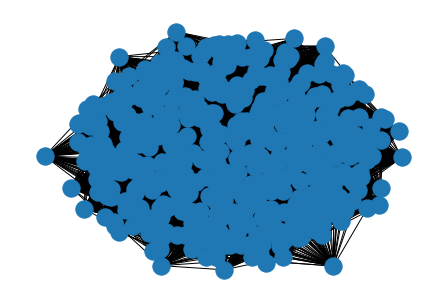

In [34]:
erdos1 = erdos_renyi_graph(500, 0.2)
average_degree = erdos1.degree
nx.draw(erdos1)

In [39]:
degree = dict(erdos1.degree())
sum(degree.values())/500

99.404

In [44]:
erdos1 = gnm_random_graph(500,500/2*1)
degree = dict(erdos1.degree())
sum(degree.values())/500

1.0

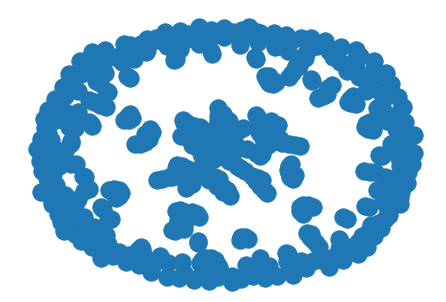

In [45]:
nx.draw(erdos1)